# **MINI PROJECT 1**

Gauri Verma

NUID: 001306996


# ABSTRACT

Medium Article: https://medium.com/@verma.g/introduction-to-deep-learning-and-neural-networks-f5982a51f626

# **INTRODUCTION TO DEEP LEARNING USING KERAS**

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers, or write models entirely from scratch via subclasssing.



# Cat or Non Cat Image Classification

In this tutorial, we will present a simple yet effective method that you can use to build a powerful image classifier, using only very few training examples --just a few hundred or thousand pictures from each class you want to be able to recognize.

A message that I hear often is that "deep learning is only relevant when you have a huge amount of data". While not entirely incorrect, this is somewhat misleading. Certainly, deep learning requires the ability to learn features automatically from the data, which is generally only possible when lots of training data is available --especially for problems where the input samples are very high-dimensional, like images. However, convolutional neural networks --a pillar algorithm of deep learning-- are by design one of the best models available for most "perceptual" problems (such as image classification), even with very little data to learn from. Training a convnet from scratch on a small image dataset will still yield reasonable results, without the need for any custom feature engineering. Convnets are just plain good. They are the right tool for the job.





In [25]:
#importing the necessary libraries
import h5py
import numpy as np
from keras import layers
from keras.layers import Input, Dense, ZeroPadding2D, BatchNormalization, Conv2D, Flatten, Activation, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [26]:
#cannot load .h5 format from git. Refer to https://github.com/gauriverma19/Advance-Data-Science/tree/master/Mini%20Project%201 for the dataset.

# Dataset for training
train = h5py.File('train_catvnoncat.h5', "r")

# Dataset for testing
test = h5py.File('test_catvnoncat.h5', "r")

In [27]:
# Check the schema of the dataset
training_data = np.array(train)
testing_data = np.array(test)

print("Training data files ",training_data)
print("Testing data files " ,testing_data)

Training data files  ['list_classes' 'train_set_x' 'train_set_y']
Testing data files  ['list_classes' 'test_set_x' 'test_set_y']


In [28]:
X_train_orig = np.array(train["train_set_x"][:]) # train set features
Y_train_orig = np.array(train["train_set_y"][:]) # train set labels

X_test_orig = np.array(test["test_set_x"][:]) # test set features
Y_test_orig = np.array(test["test_set_y"][:]) # test set labels

classes = np.array(test["list_classes"][:]) # the list of classes

In [29]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.reshape((1, Y_train_orig.shape[0])).T
Y_test = Y_test_orig.reshape((1, Y_test_orig.shape[0])).T


In [30]:
# Details of Data
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 209
number of test examples = 50
X_train shape: (209, 64, 64, 3)
Y_train shape: (209, 1)
X_test shape: (50, 64, 64, 3)
Y_test shape: (50, 1)


In [31]:
def CatNonCatModel(input_shape):
  
    # Define the input placeholder as a tensor with shape input_shape. Think of this
    X_input = Input(input_shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    #softmax here gives nearly same accuracy
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model. This creates your Keras model instance, you'll use this instance
    model = Model(inputs = X_input, outputs = X, name='CatModel')
    
    return model

# Conv2d

Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

Kernel: In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

* Mandatory Conv2D parameter is the numbers of filters that convolutional layers will learn from.
It is an integer value and also determines the number of output filters in the convolution.

* Here we are learning a total of 32 filters and then we use Max Pooling to reduce the spatial dimensions of the output volume.As far as choosing the appropriate value for no. of filters, it is always recommended to use powers of 2 as the values

* Kernel Size:  This parameter determines the dimensions of the kernel. Common dimensions include 1×1, 3×3, 5×5, and 7×7 which can be passed as (1, 1), (3, 3), (5, 5), or (7, 7) tuples.
It is an integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
This parameter must be an odd integer.

* Strides: This parameter is an integer or tuple/list of 2 integers, specifying the “step” of the convolution along with the height and width of the input volume.
Its default value is always set to (1, 1) which means that the given Conv2D filter is applied to the current location of the input volume and the given filter takes a 1-pixel step to the right and again the filter is applied to the input volume and it is performed until we reach the far right border of the volume in which we are moving our filter.



# RELU Activation

* In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

* The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero


# MaxPool2D

* In essence it scales down the matrix. You will still have the same data, but scaled down version. How much it scales is determined by stride parameter.

* Kernel size (a small window to look) determines the area to “pool” over and stride determines the step. Imagine, it starts applying kernel from upper left corner and moves the kernel by stride. So kernel 1x1 and stride 1 does nothing, keeps the input. Kernel 2x2, stride 2 will shrink the data by 2. Shrinking effect comes from the stride parameter (a step to take). Kernel 1x1, stride 2 will also shrink the data by 2, but will just keep every second pixel while 2x2 kernel will keep the max pixel from the 2x2 area

# Dense

* Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).


In [32]:
catModel = CatNonCatModel(input_shape=(64,64,3))

In [33]:
catModel.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Adam Optimizer 

* An optimizer is one of the two arguments required for compiling a Keras model:
* Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
* The method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

#Binary Cross Entropy

* We use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1). For each example, there should be a single floating-point value per prediction.




In [34]:
catModel.fit(x=X_train, y=Y_train, batch_size=60, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 223ms/step - loss: 3.5862 - accuracy: 0.5837
Epoch 2/100
4/4 [==============================] - 1s 222ms/step - loss: 1.5036 - accuracy: 0.4928
Epoch 3/100
4/4 [==============================] - 1s 221ms/step - loss: 0.9867 - accuracy: 0.7081
Epoch 4/100
4/4 [==============================] - 1s 226ms/step - loss: 0.9073 - accuracy: 0.6794
Epoch 5/100
4/4 [==============================] - 1s 225ms/step - loss: 0.5526 - accuracy: 0.7656
Epoch 6/100
4/4 [==============================] - 1s 225ms/step - loss: 0.4423 - accuracy: 0.7799
Epoch 7/100
4/4 [==============================] - 1s 220ms/step - loss: 0.3664 - accuracy: 0.8421
Epoch 8/100
4/4 [==============================] - 1s 225ms/step - loss: 0.3606 - accuracy: 0.8517
Epoch 9/100
4/4 [==============================] - 1s 228ms/step - loss: 0.2545 - accuracy: 0.9091
Epoch 10/100
4/4 [==============================] - 1s 225ms/step - loss: 0.2128 - accuracy: 0.9091
Epoch 11/

In [47]:
preds = catModel.evaluate(x=X_test, y=Y_test, batch_size=150)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.8000

Loss = 0.6529914140701294
Test Accuracy = 0.800000011920929


In [41]:
def isCatOrNot(img_path):
    
    img = image.load_img(img_path, target_size=(64, 64))
    imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    p = catModel.predict(x)

    print (p)

    if str(p)=='[[1.]]':
        print("This is a cat")
    elif str(p)=='[[0.]]':
        print("This is not a cat")
    
    return


[[0.]]
This is not a cat


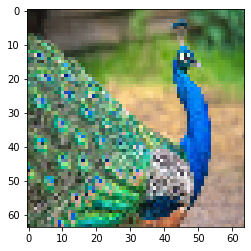

In [42]:
isCatOrNot(img_path='test4.jpeg')

[[1.]]
This is a cat


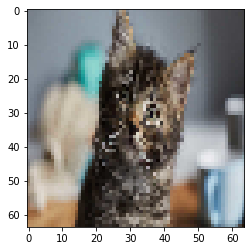

In [43]:
isCatOrNot(img_path='test2.jpeg')

[[0.]]
This is not a cat


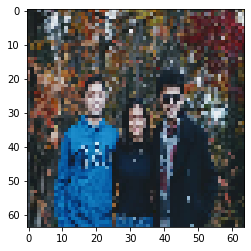

In [44]:
isCatOrNot(img_path='test3.jpeg')

# Save Model

In [102]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [103]:
model_json = catModel.to_json()
with open("catModel.json", "w") as json_file:
  json_file.write(model_json)
  catModel.save_weights("catModel.h5")
  print("Saved model to disk")

Saved model to disk


In [104]:
#model2 = model_from_json(open("catModel.json", "r").read())
#model2.load_weights('catModel.h5')

# Using keras vgg16 model to predict image details

VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

A more refined approach would be to leverage a network pre-trained on a large dataset. Such a network would have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.

We will use the VGG16 architecture, pre-trained on the ImageNet dataset --a model previously featured on this blog. Because the ImageNet dataset contains several "cat" classes (persian cat, siamese cat...) and many "dog" classes among its total of 1000 classes, this model will already have learned features that are relevant to our classification problem. In fact, it is possible that merely recording the softmax predictions of the model over our data rather than the bottleneck features would be enough to solve our dogs vs. cats classification problem extremely well. However, the method we present here is more likely to generalize well to a broader range of problems, including problems featuring classes absent from ImageNet.




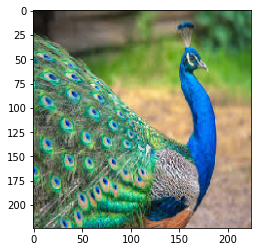

In [110]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow

#fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
#img_path = fnames[1] # Choose one image to view
img = image.load_img('test4.jpeg', target_size=(224, 224)) # load image and resize it
x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

plt.imshow(image.array_to_img(x[0]))

In [111]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications import VGG16

model = VGG16(weights='imagenet', include_top=True)

features = model.predict(x)
decode_predictions(features, top=5)

[[('n01806143', 'peacock', 0.59148926),
  ('n01820546', 'lorikeet', 0.20396553),
  ('n01945685', 'slug', 0.05135202),
  ('n09229709', 'bubble', 0.03280742),
  ('n01944390', 'snail', 0.031467084)]]

# Conclusion:

We have walked through a python tutorial and learnt the working of the keras library while implementing neural networks for image classification. We have understood various parameters and functions during the process. It has given us a brief introduction after which we can dive deeper into it. A more detailed explanation is given in the medium article linked in the beginning of the notebook!

# CITATIONS

Referred code and knowledge from the following links:


https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

https://wtfleming.github.io/2019/05/12/keras-cats-vs-dogs-part-2/

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

https://keras.io/about/


Copyright 2020 Gauri Verma

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.